### CSE 158R / Assignment 2

#### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

### Part 1 [EDA] :

#### Reading in datasets

In [2]:
recipes = pd.read_csv('data/PP_recipes.csv').sort_values(by = 'i').set_index('i')
recipes.head()

,id,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
i,,,,,,,
0,40893,"[40480, 1454, 16201, 2056, 955, 541, 11332, 82...","[[1424, 8876, 11007], [3484, 21453], [38966, 2...","[40480, 40482, 23667, 11007, 240, 21453, 240, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...",0,"[3384, 7979, 2127, 3502, 3217, 1257, 2778, 500..."
1,44394,"[40480, 34712, 22683, 11274, 5409, 29868, 40481]","[[5343, 535, 2044, 5409, 7087], [17869, 6020],...","[40480, 40482, 12172, 1281, 5409, 7087, 240, 6...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[912, 7557, 2499, 5382]"
2,85009,"[40480, 12187, 13995, 571, 14719, 40481]","[[1061, 494, 813, 2141], [31843], [30645, 4785...","[40480, 40482, 2572, 19472, 31757, 512, 823, 4...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",2,"[4623, 6265, 1168, 6016, 3597, 3440, 7213, 169..."
3,134728,"[40480, 27, 12, 263, 4017, 1494, 273, 14122, 4...","[[5867, 34056], [17918], [15022, 8361], [6953]...","[40480, 40482, 7087, 17918, 240, 6953, 488, 11...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[1304, 2683, 3217, 6270, 3532, 869, 7557, 3698..."
4,200236,"[40480, 16212, 11880, 556, 19811, 12772, 22075...","[[16212, 1535], [6953], [1430, 1301, 11332], [...","[40480, 40482, 2525, 10906, 485, 29848, 40478,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",2,"[4130, 6270, 3486, 7557, 5010, 3203, 2683, 125..."


In [3]:
users = pd.read_csv('data/PP_users.csv', index_col = 'u')
users.head()

,techniques,items,n_items,ratings,n_ratings
u,,,,,
0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


In [4]:
train_interactions = pd.read_csv('data/interactions_train.csv').drop(columns = ['u', 'i'])
train_interactions.head()

,user_id,recipe_id,date,rating
0,2046,4684,2000-02-25,5.0
1,2046,517,2000-02-25,5.0
2,1773,7435,2000-03-13,5.0
3,1773,278,2000-03-13,4.0
4,2046,3431,2000-04-07,5.0


In [5]:
val_interactions = pd.read_csv('data/interactions_validation.csv').drop(columns = ['u', 'i'])
test_interactions = pd.read_csv('data/interactions_test.csv')

In [6]:
val_interactions

,user_id,recipe_id,date,rating
0,76535,33627,2005-02-15,4.0
1,160497,75307,2005-10-24,4.0
2,930021,100961,2008-11-30,4.0
3,58439,154105,2007-03-24,4.0
4,628951,14525,2008-02-16,5.0
...,...,...,...,...
7018,557416,247915,2007-10-25,5.0
7019,218411,116676,2005-09-21,3.0
7020,587445,206493,2008-07-16,5.0
7021,1724643,65883,2011-11-08,5.0


In [7]:
train_interactions.shape[0] + val_interactions.shape[0] + test_interactions.shape[0]

718379

#### Total Number of Users

In [8]:
users.shape[0]

25076

In [9]:
# The following line confirms that the number of items for a user is the same as their number of ratings
np.all(users['n_items'] == users['n_ratings'])

# Therefore, we can drop the n_items column
users = users.drop(columns = 'n_items')
users.head()

,techniques,items,ratings,n_ratings
u,,,,
0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...","[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...","[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...","[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


#### Finding the 15 most active users by number of ratings

In [10]:
top15 = users.sort_values(by = 'n_ratings', ascending = False).iloc[:15]
top15 # These are the 15 users with the most number of ratings

,techniques,items,ratings,n_ratings
u,,,,
94,"[2508, 26, 18, 1319, 1516, 1, 5, 123, 29, 2488...","[91791, 3798, 150824, 101819, 32984, 137191, 1...","[4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, ...",6437
275,"[977, 19, 15, 772, 981, 2, 9, 164, 28, 1556, 3...","[149428, 147083, 83459, 11578, 70918, 78548, 8...","[5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",4581
193,"[997, 46, 2, 531, 613, 2, 3, 144, 21, 1206, 33...","[135512, 164305, 41269, 133049, 134610, 85304,...","[5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 3.0, ...",3656
241,"[1112, 15, 12, 638, 979, 2, 0, 72, 11, 1180, 3...","[76442, 164837, 5559, 149181, 3020, 39614, 148...","[0.0, 4.0, 4.0, 4.0, 0.0, 5.0, 5.0, 1.0, 5.0, ...",3465
208,"[1175, 27, 6, 631, 713, 2, 1, 76, 22, 1187, 22...","[48637, 136663, 97290, 45833, 161663, 26019, 1...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, ...",3338
130,"[1225, 16, 6, 606, 584, 3, 0, 81, 16, 1073, 16...","[136789, 122200, 46974, 15392, 61373, 95418, 3...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",2851
564,"[818, 3, 6, 429, 856, 0, 3, 59, 13, 855, 81, 6...","[90424, 14622, 152154, 35866, 53437, 165607, 6...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",2798
164,"[748, 19, 13, 401, 679, 1, 2, 86, 18, 930, 23,...","[29224, 40400, 155771, 9161, 6413, 97060, 6374...","[5.0, 5.0, 4.0, 5.0, 4.0, 4.0, 3.0, 4.0, 5.0, ...",2733
319,"[518, 14, 11, 492, 679, 3, 4, 63, 17, 795, 15,...","[165762, 79467, 125, 150899, 30739, 84214, 488...","[5.0, 0.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, ...",2602


#### Average ratings of the top 15 users

In [11]:
top15['ratings'] = top15['ratings'].apply(ast.literal_eval)
top15['mean_rating'] = top15['ratings'].apply(np.mean)

In [12]:
top15

,techniques,items,ratings,n_ratings,mean_rating
u,,,,,
94,"[2508, 26, 18, 1319, 1516, 1, 5, 123, 29, 2488...","[91791, 3798, 150824, 101819, 32984, 137191, 1...","[4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, ...",6437,4.966755
275,"[977, 19, 15, 772, 981, 2, 9, 164, 28, 1556, 3...","[149428, 147083, 83459, 11578, 70918, 78548, 8...","[5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",4581,4.783672
193,"[997, 46, 2, 531, 613, 2, 3, 144, 21, 1206, 33...","[135512, 164305, 41269, 133049, 134610, 85304,...","[5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 3.0, ...",3656,4.754923
241,"[1112, 15, 12, 638, 979, 2, 0, 72, 11, 1180, 3...","[76442, 164837, 5559, 149181, 3020, 39614, 148...","[0.0, 4.0, 4.0, 4.0, 0.0, 5.0, 5.0, 1.0, 5.0, ...",3465,4.696104
208,"[1175, 27, 6, 631, 713, 2, 1, 76, 22, 1187, 22...","[48637, 136663, 97290, 45833, 161663, 26019, 1...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, ...",3338,4.908328
130,"[1225, 16, 6, 606, 584, 3, 0, 81, 16, 1073, 16...","[136789, 122200, 46974, 15392, 61373, 95418, 3...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",2851,4.938969
564,"[818, 3, 6, 429, 856, 0, 3, 59, 13, 855, 81, 6...","[90424, 14622, 152154, 35866, 53437, 165607, 6...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",2798,4.834882
164,"[748, 19, 13, 401, 679, 1, 2, 86, 18, 930, 23,...","[29224, 40400, 155771, 9161, 6413, 97060, 6374...","[5.0, 5.0, 4.0, 5.0, 4.0, 4.0, 3.0, 4.0, 5.0, ...",2733,4.719356
319,"[518, 14, 11, 492, 679, 3, 4, 63, 17, 795, 15,...","[165762, 79467, 125, 150899, 30739, 84214, 488...","[5.0, 0.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, ...",2602,4.636434


#### Comparing average ratings of the top 15 users vs all users' average ratings

We can see that the top 15 users have an average rating which is above average from the mean ratings of all users in the dataset.

In [13]:
avgRatingTop15 = top15['mean_rating'].mean()
avgRatingTop15

4.7612401891875

In [14]:
users['ratings'] = users['ratings'].apply(ast.literal_eval)
users['mean_rating'] = users['ratings'].apply(np.mean)

In [15]:
avgRatingAll = users['mean_rating'].mean()
avgRatingAll

4.451941452404273

In [16]:
avgRatingTop15 - avgRatingAll

0.3092987367832274

#### Visualizing the spread of number of ratings per user (remove outliers)

In [17]:
users['n_ratings'].describe()

count    25076.000000
mean        27.871311
std        122.729039
min          2.000000
25%          3.000000
50%          6.000000
75%         16.000000
max       6437.000000
Name: n_ratings, dtype: float64

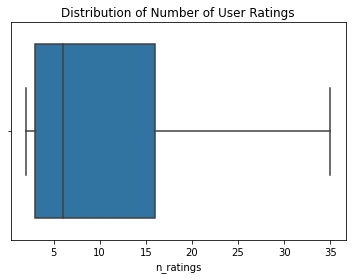

In [18]:
sns.boxplot(x = users['n_ratings'], showfliers = False).set(title='Distribution of Number of User Ratings');

#### Total Number of Recipes

In [19]:
recipes.shape[0]

178265

#### Visualizing the Spread of Calories for Each Recipe

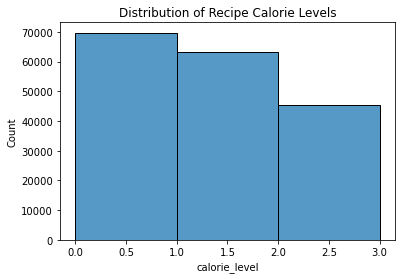

In [20]:
sns.histplot(x = recipes['calorie_level'], bins = np.arange(0, 4)).set(title='Distribution of Recipe Calorie Levels');

In [21]:
recipes['ingredient_ids'] = recipes['ingredient_ids'].apply(ast.literal_eval)
recipes['steps_tokens'] = recipes['steps_tokens'].apply(ast.literal_eval)
recipes['num_ingredients'] = recipes['ingredient_ids'].apply(len)
recipes['num_steps'] = recipes['steps_tokens'].apply(len)

#### Visualizing the Spread of Recipe Ingredients

In [22]:
recipes['num_ingredients'].describe()

count    178265.000000
mean          9.006098
std           3.226735
min           1.000000
25%           7.000000
50%           9.000000
75%          11.000000
max          20.000000
Name: num_ingredients, dtype: float64

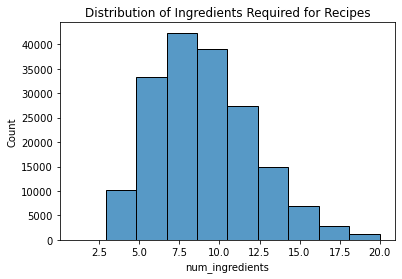

In [23]:
sns.histplot(x = recipes['num_ingredients'], bins = 10).set(title='Distribution of Ingredients Required for Recipes');

#### Visualizing the Spread of Recipe Steps

In [24]:
recipes['num_steps'].describe()

count    178265.000000
mean        117.855288
std          53.947957
min          11.000000
25%          76.000000
50%         110.000000
75%         154.000000
max         256.000000
Name: num_steps, dtype: float64

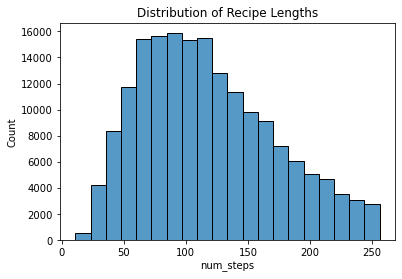

In [25]:
sns.histplot(x = recipes['num_steps'], bins = 20).set(title='Distribution of Recipe Lengths');

#### Visualizing the Trend over Time for a Particular Recipe

We will take the recipe from the training set that was rated the most number of times. We will then plot its trend of ratings over time. This is because the recipe could have been improved due to user feedback.

In [26]:
np.array(train_interactions['recipe_id'])

array([  4684,    517,   7435, ..., 131607, 363072, 314535])

In [27]:
recipe_freq = {}

for item in np.array(train_interactions['recipe_id']):
    if item in recipe_freq.keys():
        recipe_freq[item] += 1
    else:
        recipe_freq[item] = 1

In [28]:
sorted_frequencies = sorted([(recipe_freq[x], x) for x in recipe_freq], reverse = True)
mostFreqRecipe = sorted_frequencies[0][1]
mostFreqRecipeCount = sorted_frequencies[0][0]

In [29]:
mostFreq = train_interactions[train_interactions['recipe_id'] == mostFreqRecipe]
mostFreq.head()

,user_id,recipe_id,date,rating
4322,39194,27208,2002-05-04,0.0
4580,28455,27208,2002-05-13,5.0
5329,41850,27208,2002-06-02,5.0
5376,39038,27208,2002-06-02,0.0
5392,35140,27208,2002-06-03,5.0


In [30]:
def extract_year(date_str):
    return date_str.split('-')[0]

In [31]:
mostFreq['year'] = mostFreq['date'].apply(extract_year)

/var/folders/18/4l8tlcpn4d3csrq90kzwg8qc0000gn/T/ipykernel_8935/1904062703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mostFreq['year'] = mostFreq['date'].apply(extract_year)


In [32]:
mostFreq

,user_id,recipe_id,date,rating,year
4322,39194,27208,2002-05-04,0.0,2002
4580,28455,27208,2002-05-13,5.0,2002
5329,41850,27208,2002-06-02,5.0,2002
5376,39038,27208,2002-06-02,0.0,2002
5392,35140,27208,2002-06-03,5.0,2002
...,...,...,...,...,...
688328,10951,27208,2015-12-25,5.0,2015
691567,1581225,27208,2016-10-25,4.0,2016
697785,2002204415,27208,2018-07-05,4.0,2018
698660,2001346577,27208,2018-10-25,5.0,2018


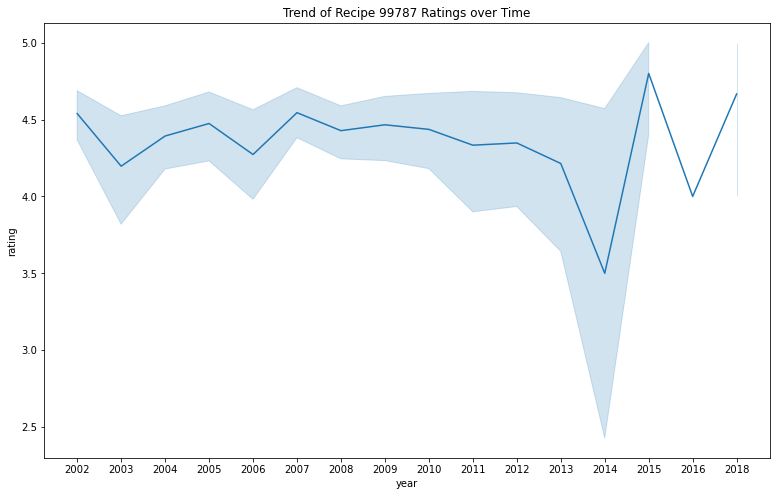

In [33]:
plt.figure(figsize = (13,8))
sns.lineplot(data = mostFreq, x = 'year', y = 'rating').set(title='Trend of Recipe 99787 Ratings over Time');

In [34]:
recipes.head()

,id,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids,num_ingredients,num_steps
i,,,,,,,,,
0,40893,"[40480, 1454, 16201, 2056, 955, 541, 11332, 82...","[[1424, 8876, 11007], [3484, 21453], [38966, 2...","[40480, 40482, 23667, 11007, 240, 21453, 240, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...",0,"[3384, 7979, 2127, 3502, 3217, 1257, 2778, 500...",9,69
1,44394,"[40480, 34712, 22683, 11274, 5409, 29868, 40481]","[[5343, 535, 2044, 5409, 7087], [17869, 6020],...","[40480, 40482, 12172, 1281, 5409, 7087, 240, 6...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[912, 7557, 2499, 5382]",4,55
2,85009,"[40480, 12187, 13995, 571, 14719, 40481]","[[1061, 494, 813, 2141], [31843], [30645, 4785...","[40480, 40482, 2572, 19472, 31757, 512, 823, 4...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",2,"[4623, 6265, 1168, 6016, 3597, 3440, 7213, 169...",13,36
3,134728,"[40480, 27, 12, 263, 4017, 1494, 273, 14122, 4...","[[5867, 34056], [17918], [15022, 8361], [6953]...","[40480, 40482, 7087, 17918, 240, 6953, 488, 11...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[1304, 2683, 3217, 6270, 3532, 869, 7557, 3698...",12,135
4,200236,"[40480, 16212, 11880, 556, 19811, 12772, 22075...","[[16212, 1535], [6953], [1430, 1301, 11332], [...","[40480, 40482, 2525, 10906, 485, 29848, 40478,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",2,"[4130, 6270, 3486, 7557, 5010, 3203, 2683, 125...",16,176


In [35]:
users.head()

,techniques,items,ratings,n_ratings,mean_rating
u,,,,,
0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31,4.806452
1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39,4.948718
2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...","[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27,4.222222
3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...","[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513,4.821547
4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...","[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376,4.388298


In [36]:
train_interactions

,user_id,recipe_id,date,rating
0,2046,4684,2000-02-25,5.0
1,2046,517,2000-02-25,5.0
2,1773,7435,2000-03-13,5.0
3,1773,278,2000-03-13,4.0
4,2046,3431,2000-04-07,5.0
...,...,...,...,...
698896,926904,457971,2018-12-18,5.0
698897,2002312797,27208,2018-12-18,5.0
698898,1290903,131607,2018-12-18,5.0
698899,226867,363072,2018-12-18,5.0


#### Train/Val/Test Split Sizes as a Percent of the Total Data Size

In [37]:
totalInteractions = train_interactions.shape[0] + val_interactions.shape[0] + test_interactions.shape[0]
totalInteractions

718379

In [38]:
train_interactions.shape[0] / totalInteractions * 100

97.28861784656846

In [39]:
val_interactions.shape[0] / totalInteractions * 100

0.9776176642134584

In [40]:
test_interactions.shape[0] / totalInteractions * 100

1.7337644892180866

#### Visualizing the Distribution of Recipe Ratings in the Training and Validation Sets

In [41]:
train_interactions['rating'].describe()

count    698901.000000
mean          4.574090
std           0.959022
min           0.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [42]:
val_interactions['rating'].describe()

count    7023.000000
mean        4.232806
std         1.302910
min         0.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [43]:
trainRatings = pd.DataFrame(train_interactions['rating']).assign(split = 'Train')
valRatings = pd.DataFrame(val_interactions['rating']).assign(split = 'Validation')

In [44]:
trainValRatings = pd.concat([trainRatings, valRatings])
trainValRatings.head()

,rating,split
0,5.0,Train
1,5.0,Train
2,5.0,Train
3,4.0,Train
4,5.0,Train


In [45]:
ratingDist = trainValRatings.groupby('split')['rating'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ratingDist['rating'] = ratingDist['rating'].apply(int)
ratingDist

,split,rating,percent
0,Train,5,74.197633
1,Train,4,18.228905
2,Train,3,3.688791
3,Train,0,2.426238
4,Train,2,0.980396
5,Train,1,0.478036
6,Validation,5,60.700555
7,Validation,4,23.309127
8,Validation,3,6.578385
9,Validation,0,5.069059


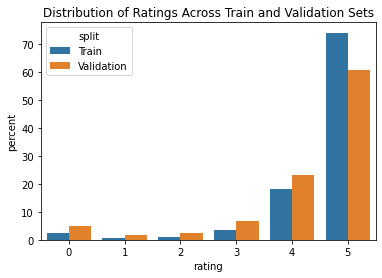

In [46]:
sns.barplot(data = ratingDist, x = 'rating', y = 'percent', hue = 'split').set(title='Distribution of Ratings Across Train and Validation Sets');

#### Visualizing the Distribution of Number of Recipes Users Have Interacted With

In [47]:
interactionCounts = train_interactions.groupby('user_id')['recipe_id'].count().reset_index().set_index('user_id')
interactionCounts.columns = ['num_ratings']
interactionCounts.head()

,num_ratings
user_id,
1533,115
1535,649
1634,48
1676,24
1773,2


In [48]:
interactionCounts[interactionCounts['num_ratings'] > 1500].shape[0]

33

In [49]:
interactionsNoOutliers = interactionCounts[interactionCounts['num_ratings'] < 1000]

In [50]:
interactionCounts['num_ratings'].describe()

count    25076.000000
mean        27.871311
std        122.729039
min          2.000000
25%          3.000000
50%          6.000000
75%         16.000000
max       6437.000000
Name: num_ratings, dtype: float64

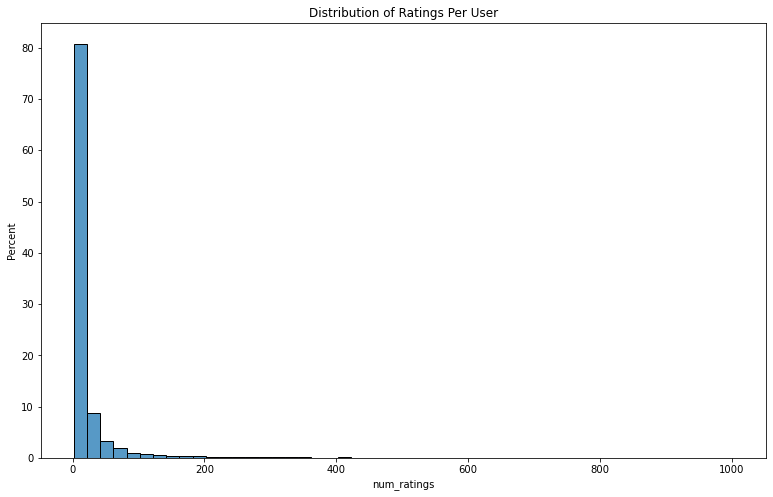

In [51]:
plt.figure(figsize = (13,8))
sns.histplot(data = interactionsNoOutliers, x = 'num_ratings', binwidth = 20, stat = 'percent').set(title='Distribution of Ratings Per User');

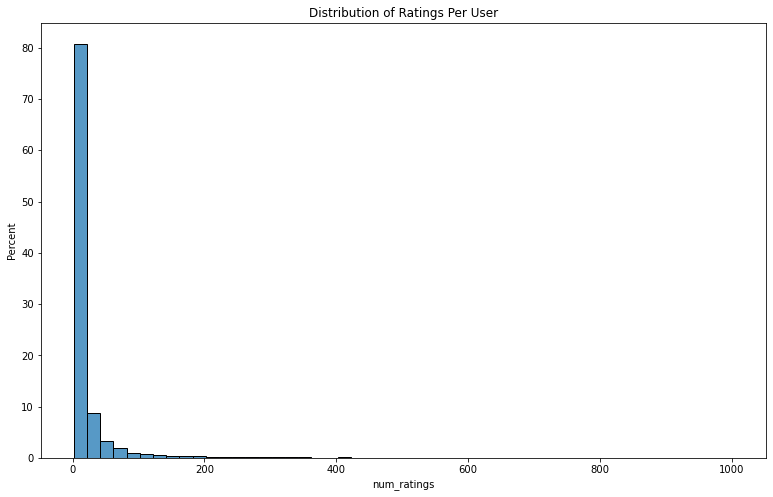

In [52]:
plt.figure(figsize = (13,8))
sns.histplot(data = interactionsNoOutliers, x = 'num_ratings', binwidth = 20, stat = 'percent').set(title='Distribution of Ratings Per User');

#### Comparing the representation of interactions with no ratings between train and validation sets

In [53]:
train_interactions[train_interactions['rating']==0].shape[0] / train_interactions.shape[0]

0.024262377647191805

In [54]:
val_interactions[val_interactions['rating']==0].shape[0] / val_interactions.shape[0]

0.050690588067777306

### Part 2 [Baseline]:

- Given a user ID recipe ID pair, predict that the user interacts with the recipe if it is in the top 50% of most interacted with recipes. 
- If we predict that there is an interaction, then predict that they would leave a rating if they do so more often than they do not.
- If we predict that they would leave a rating, predict their average rating across all recipes. 
- If the user never interated with any recipes, we predict that their rating is the global average rating.

#### We will be predicting the rating in the interval [0, 5], where a rating of 0 will mean there is no rating given an interaction. 

Extracting the top 50% most interacted with recipes and their interaction counts.

In [55]:
interactions_counts = train_interactions.groupby('recipe_id')['user_id'].count().sort_values(ascending = False)
interactions_counts

recipe_id
27208     1091
89204     1075
32204      897
39087      894
69173      787
          ... 
252202       1
252194       1
252185       1
252184       1
537458       1
Name: user_id, Length: 160901, dtype: int64

In [56]:
popular_threshold = interactions_counts.sum()//2
popular_threshold

349450

In [57]:
cumulative_interactions = np.cumsum(interactions_counts)
cumulative_interactions

recipe_id
27208       1091
89204       2166
32204       3063
39087       3957
69173       4744
           ...  
252202    698897
252194    698898
252185    698899
252184    698900
537458    698901
Name: user_id, Length: 160901, dtype: int64

In [58]:
top50_recipes_w_cumsum = cumulative_interactions[cumulative_interactions < popular_threshold]
top50_recipes_w_cumsum

recipe_id
27208       1091
89204       2166
32204       3063
39087       3957
69173       4744
           ...  
99500     349405
217683    349414
237519    349423
264932    349432
54252     349441
Name: user_id, Length: 14380, dtype: int64

In [59]:
top50_recipes = top50_recipes_w_cumsum.index
top50_recipes

Int64Index([ 27208,  89204,  32204,  39087,  69173,  54257,  22782,  68955,
             25885,  28148,
            ...
            264839, 237394, 427197,  94547, 169001,  99500, 217683, 237519,
            264932,  54252],
           dtype='int64', name='recipe_id', length=14380)

In [60]:
top50_recipes_w_counts = interactions_counts.loc[top50_recipes]
top50_recipes_w_counts

recipe_id
27208     1091
89204     1075
32204      897
39087      894
69173      787
          ... 
99500        9
217683       9
237519       9
264932       9
54252        9
Name: user_id, Length: 14380, dtype: int64

Viewing and generating relevant data structures.

In [61]:
train_interactions

,user_id,recipe_id,date,rating
0,2046,4684,2000-02-25,5.0
1,2046,517,2000-02-25,5.0
2,1773,7435,2000-03-13,5.0
3,1773,278,2000-03-13,4.0
4,2046,3431,2000-04-07,5.0
...,...,...,...,...
698896,926904,457971,2018-12-18,5.0
698897,2002312797,27208,2018-12-18,5.0
698898,1290903,131607,2018-12-18,5.0
698899,226867,363072,2018-12-18,5.0


In [62]:
train_interactions['user_id']

0               2046
1               2046
2               1773
3               1773
4               2046
             ...    
698896        926904
698897    2002312797
698898       1290903
698899        226867
698900    2000498330
Name: user_id, Length: 698901, dtype: int64

In [63]:
train_interactions['recipe_id']

0           4684
1            517
2           7435
3            278
4           3431
           ...  
698896    457971
698897     27208
698898    131607
698899    363072
698900    314535
Name: recipe_id, Length: 698901, dtype: int64

In [64]:
train_interactions['interactions'] = train_interactions.apply(lambda x: (x['user_id'], x['recipe_id']), axis = 1)

In [65]:
train_interactions['interactions_w_rating'] = train_interactions.apply(lambda x: (x['user_id'], x['recipe_id'], x['rating']), axis = 1)

In [66]:
val_interactions['interactions'] = val_interactions.apply(lambda x: (x['user_id'], x['recipe_id']), axis = 1)

In [67]:
val_interactions['interactions_w_rating'] = val_interactions.apply(lambda x: (x['user_id'], x['recipe_id'], x['rating']), axis = 1)

In [68]:
val_interactions

,user_id,recipe_id,date,rating,interactions,interactions_w_rating
0,76535,33627,2005-02-15,4.0,"(76535, 33627)","(76535, 33627, 4.0)"
1,160497,75307,2005-10-24,4.0,"(160497, 75307)","(160497, 75307, 4.0)"
2,930021,100961,2008-11-30,4.0,"(930021, 100961)","(930021, 100961, 4.0)"
3,58439,154105,2007-03-24,4.0,"(58439, 154105)","(58439, 154105, 4.0)"
4,628951,14525,2008-02-16,5.0,"(628951, 14525)","(628951, 14525, 5.0)"
...,...,...,...,...,...,...
7018,557416,247915,2007-10-25,5.0,"(557416, 247915)","(557416, 247915, 5.0)"
7019,218411,116676,2005-09-21,3.0,"(218411, 116676)","(218411, 116676, 3.0)"
7020,587445,206493,2008-07-16,5.0,"(587445, 206493)","(587445, 206493, 5.0)"
7021,1724643,65883,2011-11-08,5.0,"(1724643, 65883)","(1724643, 65883, 5.0)"


In [69]:
train_interactions

,user_id,recipe_id,date,rating,interactions,interactions_w_rating
0,2046,4684,2000-02-25,5.0,"(2046, 4684)","(2046, 4684, 5.0)"
1,2046,517,2000-02-25,5.0,"(2046, 517)","(2046, 517, 5.0)"
2,1773,7435,2000-03-13,5.0,"(1773, 7435)","(1773, 7435, 5.0)"
3,1773,278,2000-03-13,4.0,"(1773, 278)","(1773, 278, 4.0)"
4,2046,3431,2000-04-07,5.0,"(2046, 3431)","(2046, 3431, 5.0)"
...,...,...,...,...,...,...
698896,926904,457971,2018-12-18,5.0,"(926904, 457971)","(926904, 457971, 5.0)"
698897,2002312797,27208,2018-12-18,5.0,"(2002312797, 27208)","(2002312797, 27208, 5.0)"
698898,1290903,131607,2018-12-18,5.0,"(1290903, 131607)","(1290903, 131607, 5.0)"
698899,226867,363072,2018-12-18,5.0,"(226867, 363072)","(226867, 363072, 5.0)"


Generating dictionaries of user interactions and ratings

In [70]:
interactionsPerUser = defaultdict(list)# for train
ratingsPerUser = defaultdict(list)# for train
ratingsPerRecipe = defaultdict(list) # for train
for u,rec,rat in list(train_interactions['interactions_w_rating']):
    interactionsPerUser[u].append((rec,rat))
    ratingsPerRecipe[rec].append((u,rat))
    ratingsPerUser[u].append(rat)

In [71]:
ratingsPerUser[1773]

[5.0, 4.0]

Generating global average rating

In [72]:
globalAvgRatingTrain = train_interactions[train_interactions['rating'] != 0]['rating'].mean() # Avg of nonzero ratings
globalAvgRatingTrain

4.687827739521134

Creating a helper function to check if a user is likely to leave a rating (leaves a rating over 50% of the time).

In [73]:
def predictLeaveARating(userId):
    userRatings = ratingsPerUser[userId]
    if len(userRatings) == 0:
        return -1
    prop_nonempty = np.count_nonzero(userRatings) / len(userRatings)
    return prop_nonempty > 0.5

Generate a negative interaction set for users in the training and validation set.

In [74]:
userSet = set(train_interactions['user_id']).union(val_interactions['user_id']) # Users in train + val
recipeSet = set(train_interactions['recipe_id']).union(val_interactions['recipe_id']) # Recipes in train + val
ratingSet = set(train_interactions['interactions']).union(val_interactions['interactions']) # Interactions in train + val

lUserSet = list(userSet)
lRecipeSet = list(recipeSet)

notInteracted = set()

existing_interactions = list(val_interactions['interactions'])
for u,rec in existing_interactions: # correct number of interactions
    rand_u = np.random.choice(lUserSet) # make a random existing user
    rand_r = np.random.choice(lRecipeSet) # make a random existing recipe
    while ((rand_u,rand_r) in existing_interactions or (rand_u,rand_r) in notInteracted): # check if already interacted or already in notInteracted
        rand_r = np.random.choice(lRecipeSet) # randomly select another recipe because this user-recipe interaction is existing
    notInteracted.add((rand_u,rand_r))
    
interactedValid = set(val_interactions['interactions'])

In [75]:
fullValidation = list(interactedValid.union(notInteracted)) # Has half interacted, half not interacted

In [76]:
labels = []
for tup in fullValidation:
    user = tup[0]
    recipe = tup[1]
    label = []
    label.append((tup in interactedValid)) # Interacted prediction
    
    if label[0] == False:
        label.append(-1)
    else:
        label.append(val_interactions[val_interactions['interactions'] == tup]['rating'].iloc[0]) # True rating for the validation interaction
    labels.append(label)

### Check baseline model performance on the validation set

In [77]:
userRat = np.array(ratingsPerUser[66766])

In [78]:
np.mean(userRat[userRat > 0])

4.666666666666667

Defining the baseline prediction function.

In [79]:
def makePrediction(datum):
    # datum is a tuple of userID, recipeID
    userID = datum[0]
    recipeID = datum[1]
    label = []
    
    # Predict whether interaction occurs
    label.append(recipeID in top50_recipes)
    
    # Append -1 for 2nd element if predict no interaction
    if label[0] == False:
        label.append(-1)
        return label
    
    # Append 0 for 2nd element if predict interaction but no rating
    if predictLeaveARating(userID) == False:
        label.append(0)
        return label
        
    userRat = np.array(ratingsPerUser[userID])
    
    # If no train ratings, predict global average rating
    if len(userRat) == 0:
        label.append(globalAvgRatingTrain)
        return label
    
   
    # Else predict the average train rating for that user
    # Exclude all 0 ratings
    indlUserMean = np.ceil(np.mean(userRat[userRat > 0])) # Excludes all 0's
    label.append(indlUserMean)
    return label

In [80]:
predictions = [makePrediction(datum) for datum in fullValidation]
predictions

[[False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [Fals

In [81]:
correct = np.array(predictions) == np.array(labels)
correct # column 0 is interacted pred, column 1 is rating pred

array([[ True,  True],
       [False, False],
       [ True,  True],
       ...,
       [False, False],
       [False, False],
       [False, False]])

In [82]:
meanCorrect = np.mean(correct, axis = 0)
meanCorrect

array([0.45578812, 0.45578812])

In [83]:
baselineInteractionAccuracy = meanCorrect[0]
baselineInteractionAccuracy

0.45578812473302005

In [84]:
baselinePredictionAccuracy = meanCorrect[1]
baselinePredictionAccuracy

0.45578812473302005

Making adjustments for baseline accuracy calculation.

If the interaction prediction is incorrect, the rating prediction will also be incorrect. 

For instance:
- If there is actually an interaction, but we predict no interaction:
 - There will be an actual rating label from 0 to 5
 - We will predict -1
- If there is actually not an interaction, but we predict there is an interaction:
 - Actual rating label will be -1
 - We will predict from 0 to 5
 
Therefore, for the baseline prediction accuracy, we should adjust it to predict in cases only where there actually IS an interaction and we correctly predict there is an interaction.

In [85]:
performance_df = pd.DataFrame(labels, columns = ['label_inter', 'label_rat'])
performance_df = pd.concat([performance_df, pd.DataFrame(predictions, columns = ['pred_inter', 'pred_rat'])], axis = 1)
performance_df

,label_inter,label_rat,pred_inter,pred_rat
0,False,-1.0,False,-1.0
1,True,4.0,False,-1.0
2,False,-1.0,False,-1.0
3,True,5.0,False,-1.0
4,False,-1.0,False,-1.0
...,...,...,...,...
14041,False,-1.0,False,-1.0
14042,True,0.0,False,-1.0
14043,True,0.0,False,-1.0
14044,True,5.0,False,-1.0


In [86]:
correct = 0
total = performance_df.shape[0]
for i in np.arange(total):
    a = performance_df['label_inter'][i]
    b = performance_df['pred_inter'][i]
    if performance_df['label_inter'][i] == performance_df['pred_inter'][i]:
        if performance_df['label_rat'][i] == performance_df['pred_rat'][i]:
            correct = correct + 1

In [87]:
baselinePredictionAccuracyAdjusted = correct/total
baselinePredictionAccuracyAdjusted 

0.45578812473302005

### Part 3 [Model]:

In [88]:
import gzip
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy as np
import string
import random
import string
from sklearn import linear_model
from nltk.corpus import stopwords
from nltk.stem.porter import *

Defining helper functions.

In [89]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom == 0:
        return 0
    return numer / denom

In [90]:
def jacc_user(u, r):
    rprime = [j[0] for j in interactionsPerUser[u]]
    users_interacted_r = [j[0] for j in ratingsPerRecipe[r]]
    
    jaccard_list = np.array([])
    for r in rprime:
        users_interacted_rprime = [j[0] for j in ratingsPerRecipe[r]]
        jaccard = Jaccard(set(users_interacted_r), set(users_interacted_rprime))
        jaccard_list = np.append(jaccard_list, jaccard)
    
    return jaccard_list

In [91]:
def jacc_recipe(u, r):
    uprime = [j[0] for j in ratingsPerRecipe[r]]
    recipes_interacted_u = [j[0] for j in interactionsPerUser[u]]
    
    jaccard_list = np.array([])
    for u in uprime:
        recipes_interacted_uprime = [j[0] for j in interactionsPerUser[u]]
        jaccard = Jaccard(set(recipes_interacted_u), set(recipes_interacted_uprime))
        jaccard_list = np.append(jaccard_list, jaccard)
    
    return jaccard_list

In [92]:
def popularity(recipe_id):
    if recipe_id in interactions_counts.index:
        return interactions_counts[recipe_id]
    else:
        return 0

In [93]:
def mostSimilarN(ls, N):
    ls_sorted = np.sort(ls)[::-1]
    return ls_sorted[:N]

In [94]:
def JaccUserN(u, r, N):
    return mostSimilarN(jacc_user(u, r), N)

In [95]:
def JaccRecipeN(u, r, N):
    return mostSimilarN(jacc_recipe(u, r), N)

In [96]:
(2046, 4684) # test functions with this pair

(2046, 4684)

In [97]:
interactionsPerUser[2046]

[(4684, 5.0), (517, 5.0), (3431, 5.0), (13307, 5.0)]

In [98]:
ratingsPerRecipe[4684]

[(2046, 5.0),
 (12882, 5.0),
 (37758, 5.0),
 (37636, 5.0),
 (54697, 5.0),
 (37779, 5.0),
 (126440, 5.0),
 (160974, 5.0),
 (170990, 5.0),
 (171303, 5.0),
 (237715, 5.0),
 (259150, 5.0),
 (121582, 5.0),
 (62005, 5.0),
 (227932, 5.0),
 (354675, 5.0),
 (139200, 5.0),
 (358698, 5.0),
 (268411, 5.0),
 (256795, 5.0),
 (173880, 5.0),
 (49561, 5.0),
 (623462, 5.0),
 (892642, 3.0),
 (882557, 5.0),
 (868626, 5.0),
 (531163, 5.0),
 (596266, 5.0),
 (487703, 5.0),
 (15521, 5.0),
 (545825, 5.0),
 (1621368, 5.0),
 (372395, 5.0),
 (376189, 5.0),
 (362983, 5.0),
 (878561, 5.0)]

In [99]:
jacc_recipe(2046, 4684)

array([1.00000000e+00, 1.51515152e-02, 5.00000000e-02, 1.16686114e-03,
       3.92156863e-03, 1.08577633e-03, 6.59630607e-04, 8.90471950e-04,
       1.00000000e-01, 3.01204819e-03, 1.13636364e-02, 1.42857143e-02,
       4.34782609e-02, 2.77777778e-02, 2.00000000e-02, 4.92610837e-03,
       1.11111111e-01, 5.05050505e-03, 7.14285714e-02, 4.36681223e-03,
       4.40528634e-03, 8.13008130e-03, 1.11111111e-01, 8.33333333e-02,
       1.66666667e-01, 6.38297872e-02, 2.12765957e-02, 6.66666667e-02,
       5.55555556e-02, 2.58397933e-03, 5.29100529e-03, 1.25000000e-01,
       4.00000000e-02, 1.17647059e-02, 2.81690141e-03, 9.09090909e-02])

In [100]:
jacc_user(2046, 4684)

array([1.        , 0.05555556, 0.04761905, 0.00869565])

In [101]:
popularity(4684)

36

In [102]:
mostSimilarN(jacc_user(2046, 4684), 2)

array([1.        , 0.05555556])

In [103]:
mostSimilarN(jacc_recipe(2046, 4684), 2)

array([1.        , 0.16666667])

In [104]:
JaccUserN(2046, 4684, 2)

array([1.        , 0.05555556])

In [105]:
JaccRecipeN(2046, 4684, 2)

array([1.        , 0.16666667])

#### Working towards the model

In [106]:
top50_recipes

Int64Index([ 27208,  89204,  32204,  39087,  69173,  54257,  22782,  68955,
             25885,  28148,
            ...
            264839, 237394, 427197,  94547, 169001,  99500, 217683, 237519,
            264932,  54252],
           dtype='int64', name='recipe_id', length=14380)

In [107]:
interactions_counts

recipe_id
27208     1091
89204     1075
32204      897
39087      894
69173      787
          ... 
252202       1
252194       1
252185       1
252184       1
537458       1
Name: user_id, Length: 160901, dtype: int64

In [108]:
globalAvgRatingTrain

4.687827739521134

In [109]:
labels # actual values in Full Validation set 

[[False, -1],
 [True, 4.0],
 [False, -1],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [False, -1],
 [True, 3.0],
 [True, 5.0],
 [False, -1],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [True, 5.0],
 [True, 5.0],
 [False, -1],
 [True, 5.0],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [True, 0.0],
 [False, -1],
 [True, 5.0],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [False, -1],
 [True, 0.0],
 [True, 4.0],
 [False, -1],
 [True, 4.0],
 [False, -1],
 [True, 5.0],
 [False, -1],
 [True, 5.0],
 [True, 4.0],
 [True, 2.0],
 [True, 5.0],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [True, 5.0],
 [True, 5.0],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [True, 4.0],
 [True, 4.0],
 [True, 5.0],
 [True, 3.0],
 [True, 3.0],
 [True, 5.0],
 [True, 5.0],
 [True, 5.0],
 [True, 0.0],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [True, 5.0],
 [False, -1],
 [True, 5.0],
 [False, -1],
 [True, 4.0],
 [False, -1],
 [True

In [110]:
label_interacted = [i[0] for i in labels]
label_rating = [i[1] for i in labels]

#### Model 1 (interaction)

In [111]:
def featInteraction1(u, rec):
    pop = popularity(rec) 
    jacc_u = jacc_user(u, rec)
    jacc_r = jacc_recipe(u, rec)
    if len(jacc_u) == 0:
        jacc_u = 0
    if len(jacc_r) == 0:
        jacc_r = 0
    return [1] + [pop, np.max(jacc_u), np.max(jacc_r)]

In [112]:
Xpred1 = [featInteraction1(d[0], d[1]) for d in fullValidation]
Xpred1

[[1, 1, 0.045454545454545456, 0.007072135785007072],
 [1, 0, 0.0, 0],
 [1, 2, 0.0, 0.0],
 [1, 0, 0.0, 0],
 [1, 5, 0.014492753623188406, 0.007462686567164179],
 [1, 5, 0.009174311926605505, 0.0010893246187363835],
 [1, 3, 0.14285714285714285, 0.0005868544600938967],
 [1, 0, 0.0, 0],
 [1, 0, 0.0, 0],
 [1, 1, 0.0, 0.0],
 [1, 0, 0.0, 0],
 [1, 8, 0.0, 0.0],
 [1, 6, 0.0, 0.0],
 [1, 0, 0.0, 0],
 [1, 0, 0.0, 0],
 [1, 7, 0.002224694104560623, 0.028985507246376812],
 [1, 0, 0.0, 0],
 [1, 0, 0.0, 0],
 [1, 1, 0.0, 0.0],
 [1, 8, 0.0, 0.0],
 [1, 0, 0.0, 0],
 [1, 3, 0.0, 0.0],
 [1, 0, 0.0, 0],
 [1, 0, 0.0, 0],
 [1, 9, 0.018867924528301886, 0.0035587188612099642],
 [1, 5, 0.0, 0.0],
 [1, 3, 0.0, 0.0],
 [1, 0, 0.0, 0],
 [1, 0, 0.0, 0],
 [1, 4, 0.0, 0.0],
 [1, 0, 0.0, 0],
 [1, 11, 0.047619047619047616, 0.0009910802775024777],
 [1, 0, 0.0, 0],
 [1, 1, 0.0, 0.0],
 [1, 0, 0.0, 0],
 [1, 0, 0.0, 0],
 [1, 0, 0.0, 0],
 [1, 0, 0.0, 0],
 [1, 0, 0.0, 0],
 [1, 1, 0.0, 0.0],
 [1, 1, 0.007874015748031496, 0.00144508

In [113]:
ypred1 = label_interacted
ypred1

[False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 Tru

In [114]:
mod1 = linear_model.LogisticRegression(C=1, class_weight = 'balanced')
mod1.fit(Xpred1, ypred1)

LogisticRegression(C=1, class_weight='balanced')

In [115]:
jacc_u_list = [jacc_user(i[0], i[1]) for i in fullValidation]
jacc_u_valid = [i.max() for i in jacc_u_list if len(i) != 0]

In [116]:
threshold_u1 = np.percentile([i for i in jacc_u_valid if i != 0], 99)
threshold_u1

0.3333333333333333

In [117]:
jacc_r_list = [jacc_recipe(i[0], i[1]) for i in fullValidation]
jacc_r_valid = [i.max() for i in jacc_r_list if len(i) != 0]

In [118]:
threshold_r1 = np.percentile([i for i in jacc_r_valid if i != 0], 99)
threshold_r1

0.058348416289592676

#### Extremely basic predictor for interaction only, based on popularity.

In [119]:
def interacted_predictor1(datum):
    user = datum[0]
    rec = datum[1]
    if popularity(rec) >= 9:
        return True
    return False

In [120]:
correct = 0
predictions1 = [interacted_predictor1(datum) for datum in fullValidation]
for i in np.arange(len(ypred1)):
    if predictions1[i] == ypred1[i]:
        correct += 1
accuracy1 = correct/len(ypred1)
accuracy1

0.4537234799943044

#### Predictor for interaction only, based on popularity and Jaccard similarities.

In [121]:
def interacted_predictor2(datum):
    user = datum[0]
    rec = datum[1]

    if popularity(rec) >= 9:  # last recipe in top50_recipes was interacted with 9 times
        return True
    
    uprime = [j[0] for j in interactionsPerUser[user]]
    rprime = [j[0] for j in ratingsPerRecipe[rec]]
    if len(uprime) != 0 and len(rprime) != 0:
        if np.max(jacc_user(user, rec)) >= threshold_u1 and np.max(jacc_recipe(user, rec)) >= threshold_r1:
            return True
    
    return False

In [122]:
correct = 0
predictions2 = [interacted_predictor2(datum) for datum in fullValidation]
for i in np.arange(len(ypred1)):
    if predictions2[i] == ypred1[i]:
        correct += 1
accuracy2 = correct/len(ypred1)
accuracy2

0.4537234799943044

#### More complex predictor using both popularity and regression model

In [123]:
def interacted_predictor3(datum):
    user = datum[0]
    rec = datum[1]

    if popularity(rec) >= 9:  # last recipe in top50_recipes was interacted with 9 times
        return True
    
    else:
        X1 = [featInteraction1(user, rec)]
        return mod1.predict(X1)

In [124]:
correct = 0
predictions3 = [interacted_predictor3(datum) for datum in fullValidation]
for i in np.arange(len(ypred1)):
    if predictions3[i] == ypred1[i]:
        correct += 1
accuracy3 = correct/len(ypred1)
accuracy3

0.9332906165456357

#### Final predictor, using only regression model

In [125]:
def interacted_predictor_model1(datum):
    user = datum[0]
    rec = datum[1]
    
    X1 = [featInteraction1(user, rec)]
    return mod1.predict(X1)

In [126]:
correct = 0
predictions4 = [interacted_predictor_model1(datum) for datum in fullValidation]
for i in np.arange(len(ypred1)):
    if predictions4[i] == ypred1[i]:
        correct += 1
accuracy4 = correct/len(ypred1)
accuracy4

0.9795671365513313

#### Model 1 (rating prediction):

In [127]:
#labels (label[0] interaction, label[1] rating)

In [128]:
fullValidation

[(13796, 379037),
 (283012, 309668),
 (1621833, 116313),
 (464253, 157367),
 (139991, 185331),
 (843352, 234501),
 (165528, 251132),
 (852529, 169476),
 (310542, 152511),
 (196819, 72269),
 (105471, 173494),
 (252634, 150402),
 (488239, 224607),
 (1013337, 153005),
 (345142, 145803),
 (268930, 215006),
 (66448, 512009),
 (1028642, 44867),
 (369956, 56363),
 (821834, 12223),
 (438583, 43866),
 (1379724, 220158),
 (385761, 405121),
 (354709, 174719),
 (329187, 75978),
 (714863, 373386),
 (229940, 356862),
 (148316, 119659),
 (20754, 147654),
 (368823, 213117),
 (563726, 257043),
 (611673, 139421),
 (633722, 257147),
 (1221074, 372637),
 (985894, 330587),
 (524695, 225555),
 (11044, 7762),
 (71463, 45859),
 (114105, 130915),
 (599204, 30844),
 (102602, 340888),
 (1015014, 481873),
 (195589, 126013),
 (496829, 277986),
 (113117, 115239),
 (1429389, 374580),
 (412186, 178604),
 (114287, 112610),
 (208984, 149721),
 (165511, 51218),
 (67154, 166437),
 (65059, 460539),
 (284180, 321888),
 (47

#### Using the same feature function as for rating predictions (featInteraction1)

In [129]:
ypredrat1 = label_rating 
len(ypredrat1)

14046

In [130]:
len(Xpred1)

14046

In [131]:
modrat1 = linear_model.LogisticRegression(C=1, class_weight = 'balanced')
modrat1.fit(Xpred1, ypredrat1)

LogisticRegression(C=1, class_weight='balanced')

#### Initial rating predictor using same features as for interaction prediction, using interaction prediction and regression model

In [132]:
def rating_predictor_model1(datum):
    if interacted_predictor_model1(datum) == False:
        return -1
    else:
        user = datum[0]
        rec = datum[1]
    
        X1 = [featInteraction1(user, rec)]
        rating = modrat1.predict(X1)
        if rating == -1:
            return 0
        return rating

In [133]:
correct = 0
predictionsrat1 = [rating_predictor_model1(datum) for datum in fullValidation]
for i in np.arange(len(ypredrat1)):
    if predictionsrat1[i] == ypredrat1[i]:
        correct += 1
accuracyrat1 = correct/len(ypredrat1)
accuracyrat1

0.5961127723195215

#### Rating predictor using same features as for interation prediction, using only regression model

In [134]:
def rating_predictor_model2(datum):
        user = datum[0]
        rec = datum[1]
    
        X1 = [featInteraction1(user, rec)]
        return modrat1.predict(X1)

In [135]:
correct = 0
predictionsrat2 = [rating_predictor_model2(datum) for datum in fullValidation]
for i in np.arange(len(ypredrat1)):
    if predictionsrat2[i] == ypredrat1[i]:
        correct += 1
accuracyrat2 = correct/len(ypredrat1)
accuracyrat2

0.5961127723195215

#### Using new feature function (popularity and jaccard similarity mean instead of max).

In [136]:
def featRating1(u, rec):
    pop = popularity(rec) 
    jacc_u = jacc_user(u, rec)
    jacc_r = jacc_recipe(u, rec)
    if len(jacc_u) == 0:
        jacc_u = 0
    if len(jacc_r) == 0:
        jacc_r = 0
    
    return [1] + [pop, np.mean(jacc_u), np.mean(jacc_r)]

In [137]:
XpredRat1 = [featRating1(d[0], d[1]) for d in fullValidation]
XpredRat1

[[1, 1, 0.0004487455700212167, 0.007072135785007072],
 [1, 0, 0.0, 0.0],
 [1, 2, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 5, 0.0026139581599801424, 0.0023342190630340127],
 [1, 5, 0.001834862385321101, 0.0002178649237472767],
 [1, 3, 0.0025396825396825397, 0.00019561815336463224],
 [1, 0, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 1, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 8, 0.0, 0.0],
 [1, 6, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 7, 0.0022040501090488706, 0.00519898780768346],
 [1, 0, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 1, 0.0, 0.0],
 [1, 8, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 3, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 9, 0.002695417789757412, 0.0003954132068011071],
 [1, 5, 0.0, 0.0],
 [1, 3, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 4, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 11, 0.005964405964405964, 9.009820704567979e-05],
 [1, 0, 0.0, 0.0],
 [1, 1, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 0, 0.0, 0.0],
 [1, 1, 0.0

In [138]:
modrat2 = linear_model.LogisticRegression(C=1, class_weight = 'balanced')
modrat2.fit(XpredRat1, ypredrat1)

LogisticRegression(C=1, class_weight='balanced')

In [139]:
def rating_predictor_model3(datum):
        user = datum[0]
        rec = datum[1]
    
        X1 = [featRating1(user, rec)]
        return modrat1.predict(X1)

In [140]:
correct = 0
predictionsrat3 = [rating_predictor_model3(datum) for datum in fullValidation]
for i in np.arange(len(ypredrat1)):
    if predictionsrat3[i] == ypredrat1[i]:
        correct += 1
accuracyrat3 = correct/len(ypredrat1)
accuracyrat3

0.5961127723195215

#### Using new feature function with additional features on top of popularity and jaccard similarity

In [141]:
def propLeaveARatingMod(u):
    userRatings = ratingsPerUser[u]
    if len(userRatings) == 0:
        return 0
    prop_nonempty = np.count_nonzero(userRatings) / len(userRatings)
    return prop_nonempty

In [142]:
def avgRatingMod(u):
    userRatings = ratingsPerUser[u]
    if len(userRatings) == 0:
        return 0
    avg_rat = np.mean(userRatings)
    return avg_rat

In [143]:
def featRatingmodel1(u, rec):
    pop = popularity(rec) 
    jacc_u = jacc_user(u, rec)
    jacc_r = jacc_recipe(u, rec)
    if len(jacc_u) == 0:
        jacc_u = 0
    if len(jacc_r) == 0:
        jacc_r = 0
    proportion_left_rating = propLeaveARatingMod(u)
    avg_rating = avgRatingMod(u)
    
    return [1] + [pop, np.max(jacc_u), np.max(jacc_r), proportion_left_rating, avg_rating]

In [144]:
XpredRatmod = [featRatingmodel1(d[0], d[1]) for d in fullValidation]
XpredRatmod

[[1, 1, 0.045454545454545456, 0.007072135785007072, 0.9633333333333334, 4.55],
 [1, 0, 0.0, 0, 1.0, 4.333333333333333],
 [1, 2, 0.0, 0.0, 1.0, 4.555555555555555],
 [1, 0, 0.0, 0, 0.9787234042553191, 4.680851063829787],
 [1, 5, 0.014492753623188406, 0.007462686567164179, 1.0, 4.636363636363637],
 [1, 5, 0.009174311926605505, 0.0010893246187363835, 1.0, 5.0],
 [1,
  3,
  0.14285714285714285,
  0.0005868544600938967,
  0.9861111111111112,
  4.902777777777778],
 [1, 0, 0.0, 0, 0.9574468085106383, 4.0212765957446805],
 [1, 0, 0.0, 0, 1.0, 4.894736842105263],
 [1, 1, 0.0, 0.0, 1.0, 5.0],
 [1, 0, 0.0, 0, 1.0, 4.560975609756097],
 [1, 8, 0.0, 0.0, 1.0, 4.6],
 [1, 6, 0.0, 0.0, 1.0, 5.0],
 [1, 0, 0.0, 0, 1.0, 4.625],
 [1, 0, 0.0, 0, 1.0, 4.513513513513513],
 [1, 7, 0.002224694104560623, 0.028985507246376812, 1.0, 4.5],
 [1, 0, 0.0, 0, 0.9375, 4.625],
 [1, 0, 0.0, 0, 1.0, 5.0],
 [1, 1, 0.0, 0.0, 1.0, 4.642857142857143],
 [1, 8, 0.0, 0.0, 1.0, 5.0],
 [1, 0, 0.0, 0, 1.0, 4.75],
 [1, 3, 0.0, 0.0, 1.

In [145]:
modratmod = linear_model.LogisticRegression(C=1, class_weight = 'balanced')
modratmod.fit(XpredRatmod, ypredrat1)

/Users/harshi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, class_weight='balanced')

In [146]:
def rating_predictor_model(datum):
        user = datum[0]
        rec = datum[1]
    
        X1 = [featRatingmodel1(user, rec)]
        return modratmod.predict(X1)

In [147]:
correct = 0
predictionsratmod = [rating_predictor_model(datum) for datum in fullValidation]
for i in np.arange(len(ypredrat1)):
    if predictionsratmod[i] == ypredrat1[i]:
        correct += 1
accuracyratmod = correct/len(ypredrat1)
accuracyratmod

0.711163320518297

#### Adding even more features to the model above.

Checking if user and recipe IDs are consistent across PP and split subsets

In [148]:
a = [i for i in recipes.get('id')]

In [149]:
b = [i[1] for i in fullValidation]

In [150]:
ls1 = []
for i in b:
    if i not in a:
        ls1.append(1)

In [151]:
len(ls1)

0

In [152]:
c = [i for i in recipes.index]

In [153]:
d = [i[0] for i in fullValidation]

In [154]:
ls2 = []
for i in d:
    if i not in c:
        ls2.append(1)

In [155]:
len(ls2)

10379

#### Since it appears that user and ratings IDs are not consistent across the PP and split subsets, <br /> we can extract features from only the subset data splits, and not from the larger PP datasets.


In [156]:
def numInteractions(u):
    userRatings = ratingsPerUser[u]
    return len(userRatings)

In [157]:
def avgRatingRecipe(r):
    recipeRatings = ratingsPerRecipe[r]
    if len(recipeRatings) == 0:
        return 0
    avg_rat = np.mean([i[1] for i in recipeRatings])
    return avg_rat

In [158]:
def featRatingmodel2(u, rec):
    pop = popularity(rec) 
    jacc_u = jacc_user(u, rec)
    jacc_r = jacc_recipe(u, rec)
    if len(jacc_u) == 0:
        jacc_u = 0
    if len(jacc_r) == 0:
        jacc_r = 0
    proportion_left_rating = propLeaveARatingMod(u)
    avg_rating = avgRatingMod(u)
    num_interacted = numInteractions(u)
    recRating = avgRatingRecipe(rec)
    
    return [1] + [pop, np.max(jacc_u), np.max(jacc_r), proportion_left_rating, avg_rating, num_interacted, recRating]

In [159]:
XpredRatmod2 = [featRatingmodel2(d[0], d[1]) for d in fullValidation]
XpredRatmod2

[[1,
  1,
  0.045454545454545456,
  0.007072135785007072,
  0.9633333333333334,
  4.55,
  300,
  4.0],
 [1, 0, 0.0, 0, 1.0, 4.333333333333333, 15, 0],
 [1, 2, 0.0, 0.0, 1.0, 4.555555555555555, 9, 4.5],
 [1, 0, 0.0, 0, 0.9787234042553191, 4.680851063829787, 47, 0],
 [1,
  5,
  0.014492753623188406,
  0.007462686567164179,
  1.0,
  4.636363636363637,
  11,
  4.8],
 [1, 5, 0.009174311926605505, 0.0010893246187363835, 1.0, 5.0, 5, 4.6],
 [1,
  3,
  0.14285714285714285,
  0.0005868544600938967,
  0.9861111111111112,
  4.902777777777778,
  72,
  4.666666666666667],
 [1, 0, 0.0, 0, 0.9574468085106383, 4.0212765957446805, 47, 0],
 [1, 0, 0.0, 0, 1.0, 4.894736842105263, 19, 0],
 [1, 1, 0.0, 0.0, 1.0, 5.0, 21, 4.0],
 [1, 0, 0.0, 0, 1.0, 4.560975609756097, 82, 0],
 [1, 8, 0.0, 0.0, 1.0, 4.6, 10, 5.0],
 [1, 6, 0.0, 0.0, 1.0, 5.0, 2, 4.833333333333333],
 [1, 0, 0.0, 0, 1.0, 4.625, 16, 0],
 [1, 0, 0.0, 0, 1.0, 4.513513513513513, 37, 0],
 [1, 7, 0.002224694104560623, 0.028985507246376812, 1.0, 4.5, 2

In [160]:
modratmod2 = linear_model.LogisticRegression(C=1, class_weight = 'balanced')
modratmod2.fit(XpredRatmod2, ypredrat1)

/Users/harshi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, class_weight='balanced')

In [161]:
def rating_predictor_model2(datum):
        user = datum[0]
        rec = datum[1]
    
        X1 = [featRatingmodel2(user, rec)]
        return modratmod2.predict(X1)

In [162]:
correct = 0
predictionsratmod2 = [rating_predictor_model2(datum) for datum in fullValidation]
for i in np.arange(len(ypredrat1)):
    if predictionsratmod2[i] == ypredrat1[i]:
        correct += 1
accuracyratmod2 = correct/len(ypredrat1)
accuracyratmod2

0.6495799515876406

The reason for not using N most similar users or ratings as a subset to extract features from in any predictions is because there is that the interaction matrix is sparse, and because the length of similar users that have non-zero jaccard similarity to a specific user ranges widely, weighting the N most similar users equally for all users does not make sense. Similarly, different recipes have a number of interactions that have values in a wide interval, and using data from N users for each recipe, and weighting data from each interaction equally does not make sense. This is because the N most similar users to a given user would give us more important information where the total non-zero similarity users is close to N, as compared to where there are many more than N similar users, and their similarities have negligibly differing values. With a similar logic for similarity between recipes, we can explain why we did not an N most similar based model in generating our predictions.

#### Putting interaction and ratings predictions together, and comparing performance to the baseline model using accuracy:

#### Checking baseline accuracy

In [163]:
labels # the actual values we are trying to match in our predictions

[[False, -1],
 [True, 4.0],
 [False, -1],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [False, -1],
 [True, 3.0],
 [True, 5.0],
 [False, -1],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [True, 5.0],
 [True, 5.0],
 [False, -1],
 [True, 5.0],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [True, 0.0],
 [False, -1],
 [True, 5.0],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [False, -1],
 [True, 0.0],
 [True, 4.0],
 [False, -1],
 [True, 4.0],
 [False, -1],
 [True, 5.0],
 [False, -1],
 [True, 5.0],
 [True, 4.0],
 [True, 2.0],
 [True, 5.0],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [True, 5.0],
 [True, 5.0],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [True, 4.0],
 [True, 4.0],
 [True, 5.0],
 [True, 3.0],
 [True, 3.0],
 [True, 5.0],
 [True, 5.0],
 [True, 5.0],
 [True, 0.0],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [True, 5.0],
 [False, -1],
 [True, 5.0],
 [False, -1],
 [True, 4.0],
 [False, -1],
 [True

In [164]:
predictions # baseline predictions

[[False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [True, 5.0],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [False, -1],
 [Fals

In [165]:
correct = np.array(predictions) == np.array(labels)
correct # column 0 is interacted pred, column 1 is rating pred

array([[ True,  True],
       [False, False],
       [ True,  True],
       ...,
       [False, False],
       [False, False],
       [False, False]])

In [166]:
meanCorrect = np.mean(correct, axis = 0)
meanCorrect

array([0.45578812, 0.45578812])

In [167]:
def accuracy_statement(arr, model_type):
    intAcc = str(arr[0])
    ratAcc = str(arr[1])
    print(f"The accuracy of {model_type} for interaction prediction is {intAcc}, and for rating prediction is {ratAcc}")
    return

In [168]:
accuracy_statement(meanCorrect, "the baseline")

The accuracy of the baseline for interaction prediction is 0.45578812473302005, and for rating prediction is 0.45578812473302005


#### Putting together our interaction and rating prediction models

In [169]:
intPredModF = [i[0] for i in predictions4]
ratPredModF = [i[0] for i in predictionsratmod]

In [170]:
len(intPredModF) == len(ratPredModF)

True

In [171]:
correct = 0
for i in np.arange(len(labels)):
    if intPredModF[i] == labels[i][0]:
        correct += 1
accuracyIntF = correct/len(labels)
accuracyIntF

0.9795671365513313

In [172]:
correct = 0
for i in np.arange(len(labels)):
    if ratPredModF[i] == labels[i][1]:
        correct += 1
accuracyRatF = correct/len(labels)
accuracyRatF

0.711163320518297

In [173]:
accuracy_statement(np.array([accuracyIntF, accuracyRatF]), "our model")

The accuracy of our model for interaction prediction is 0.9795671365513313, and for rating prediction is 0.711163320518297


In [174]:
accuracy_statement(meanCorrect, "the baseline")

The accuracy of the baseline for interaction prediction is 0.45578812473302005, and for rating prediction is 0.45578812473302005


can use different model combinations for q5, ex, ratPredModF = [i[0] for i in predictionsratmod2 (replace this with the list generated using same functions for predictionsratmod2, as compared to predictionsratmod, that had the highest accuracy for our fullValidation set)], since predictionsratmod2 and predictionsratmod had different feature functions